# Multiplicative Functionals

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov import MarkovChain
from mult_functional import MultiplicativeFunctional

In [3]:
# Transition probability matrix
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = MarkovChain(P)

In [4]:
# Growth rate matrix
G = [[-1, 0],
     [0.5, 1]]

In [5]:
mf = MultiplicativeFunctional(mc, G, M_inits=100)

In [6]:
mf.e

array([ 0.27223164,  0.96223175])

In [7]:
mf.eta

0.8188612124656196

In [8]:
res = mf.simulate(10)
res

       M: array([  1.00000000e+02,   1.00000000e+02,   2.71828183e+02,
         7.38905610e+02,   2.00855369e+03,   5.45981500e+03,
         1.48413159e+04,   4.03428793e+04,   1.09663316e+05,
         1.80804241e+05])
 M_tilde: array([ 1.        ,  1.55852642,  1.86802096,  2.23897539,  2.68359452,
        3.21650679,  3.85524558,  4.6208261 ,  5.53843675,  1.13911209])
       X: array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

Check that `M` and `M_tilde` satisfy the identity (5.20) (approximately):

In [9]:
exp_eta_geo_series = np.empty_like(res.M)
exp_eta_geo_series[0] = 1
exp_eta_geo_series[1:] = mf.exp_eta
np.cumprod(exp_eta_geo_series, out=exp_eta_geo_series)

M_2 = res.M[0] * res.M_tilde * mf.e[res.X[0]] * exp_eta_geo_series / mf.e[res.X]
M_2

array([  1.00000000e+02,   1.00000000e+02,   2.71828183e+02,
         7.38905610e+02,   2.00855369e+03,   5.45981500e+03,
         1.48413159e+04,   4.03428793e+04,   1.09663316e+05,
         1.80804241e+05])

In [10]:
M_2 - res.M

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.27373675e-13,   4.54747351e-13,   1.81898940e-12,
         3.63797881e-12,   1.45519152e-11,   5.82076609e-11,
         5.82076609e-11])

Let us plot sample paths of the $\widetilde{M}_t$ process.

In [11]:
ts_length = 120
num_reps = 100
res = mf.simulate(ts_length, num_reps=num_reps)

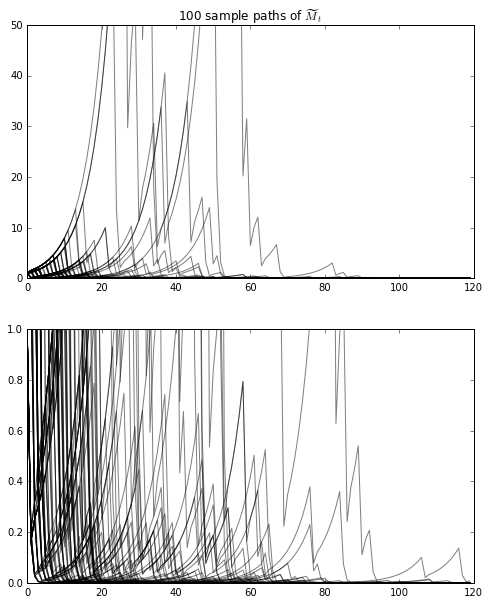

In [12]:
ylims = [50, 1]
fig, ax = plt.subplots(len(ylims), 1, figsize=(8,10))
for k, ylim in enumerate(ylims):
    for i in range(num_reps):
        ax[k].plot(res.M_tilde[i], color='k', alpha=0.5)
        ax[k].set_xlim(0, ts_length)
        ax[k].set_ylim(0, ylim)
ax[0].set_title(r'{0} sample paths of $\widetilde M_t$'.format(num_reps))
plt.show()